In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
#################
### Todo
### 2. think about evolution in slope (changes in offsets, z values?)
####           a) Need to create upstream and downstream offsets, adjust
####              these in slope adjustment and fix flow depth calcs
####              to account for offsets.
####           B) tried approach of offset adjustment. this seemed unstable
####              if instead we adjust z_arr to bed and calc slope from z_arr, this seems to work
####              Had to adjust flow calculation because of this. z_arr-->z_arr-xc.ymin
### 3. create test cases
###########3
### 4. brainstorm model scenarios to run (do this next, then plan appropriate test cases)
###     A) Thinking about short time scales - how do seasonal patterns
###        reflect in average erosion rates. 
###          1. different scenarios with different length scales of exchange and dissolution 
#####        2. seasonal sinusoidal temp curve (ignore diurnal cycles?)
###     B) Single conduit evolution
###        1. how does long-term evolution differ with w/o CO2 exchange
###        2. what impact does slope-dependent exchange have?
###        3. shear-stress dependent production (based on grain size)
###        4. How do phreatic loops evolve
###        5. What happens during periods of base level fall, stasis, or aggradation?
#################################

### 5. how to deal with loss of point density (different resampling scheme?)

Populating the interactive namespace from numpy and matplotlib


In [2]:
#import pixiedust


In [2]:
#%%pixie_debugger
from CO2_sim_1D import CO2_1D

n=20
x = linspace(0,5000,n)
z = linspace(0,1,n)
np.random.seed(7)
r = 0.5*ones(n-1)# + 0.1*np.random.rand(n-1)
#r[5] = 0.5
sim = CO2_1D(x,z, init_radii=r, 
             Q_w=0.1, 
             T_outside=0., 
             D_a=35., D_w=35.,
             adv_disp_stabil_factor=0.5,
             reduction_factor=0.005,
            dt_erode=1.,
            xc_n=1500)
ntimes = 10
fd_old=0.
for t in arange(ntimes):
    print('t=',t)
    sim.calc_flow_depths()
    fd_new = sim.fd_mids[0]
    #if t>0 and np.abs(fd_new-fd_old)>0.05:
    #    print(asdf)
    fd_old = fd_new
    sim.calc_air_flow()
    #if sim.A_a.min()==0:
    #    print(asdf)
    sim.calc_steady_state_transport()
    sim.erode_xcs()
    sim.z_arr[0] -= 0.0005
    #if t==160:
    #    print(asdf)
    if t % 10 == 0:
        timestep_str = '%04d' % (t,)
        print("Plotting timestep: ",t)
        figure()
        plot(sim.xcs[0].x ,sim.xcs[0].y)
        wl = sim.fd_mids[0]+ sim.xcs[0].y.min()
        plot([-.5,.5], [wl,wl])
        plot(sim.xcs[4].x ,sim.xcs[4].y)
        plot(sim.xcs[-1].x ,sim.xcs[-1].y)
        savefig('./XC-'+timestep_str+'.png')
        figure()
        xmid = (x[1:] + x[:-1])/2.
        plot(x, sim.h)
        plot(x,z)
        plot(x,sim.CO2_w)
        plot(x,sim.CO2_a)
        plot(x,sim.Ca)
        legend(['h','z','w','a','Ca'])
        savefig('./Profile-'+timestep_str+'.png')
        close('all')

t= 0
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 0
about to minimize
found min
Q residual for 0.7175598521593217  = 5.1554011837318114e-08
norm_fd= 0.7175598521593217   maxdepth= 0.9999994516877171
norm
getting width
got L,R
setting fd
done with this xc
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 1
about to minimize
found min
Q residual for 0.7175598521593217  = 5.1554011837318114e-08
norm_fd= 0.7175598521593217   maxdepth= 0.9999994516877171
norm
getting width
got L,R
setting fd
done with this xc
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 2
about to minimize
found min


dz= [-7.56092269e-05 -8.24948769e-05 -8.95696785e-05 -9.68374514e-05
 -1.04302175e-04 -1.11967988e-04 -1.19485472e-04 -1.26606880e-04
 -1.33375980e-04 -1.39829433e-04 -1.45998301e-04 -1.51909170e-04
 -1.57584998e-04 -1.63045766e-04 -1.68308995e-04 -1.73390141e-04
 -1.78302922e-04 -1.83059577e-04 -1.87671079e-04]
CFL= -0.001436575311118518
Plotting timestep:  0
t= 1
xc points= 1187  maxdpeth= 1.0000749309269836   max_interp= 0.8969498151991522
xc points= 1187  maxdpeth= 1.0000749309269836   max_interp= 0.8969498151991522
xc= 0
about to minimize
found min
Q residual for 0.7174422409117619  = 3.921563279662976e-08
norm_fd= 0.7174422409117619   maxdepth= 1.0000749309269836
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1187  maxdpeth= 1.0000818049331146   max_interp= 0.8969498151991522
xc points= 1187  maxdpeth= 1.0000818049331146   max_interp= 0.8969498151991522
xc= 1
about to minimize
found min
Q residual for 0.7168229756269238  = 2.8261991003031284e-07
norm_fd= 0.716

dz= [-7.58920693e-05 -8.19307654e-05 -8.94720906e-05 -9.67470511e-05
 -1.04216880e-04 -1.11886612e-04 -1.19397105e-04 -1.26514683e-04
 -1.33285639e-04 -1.39617122e-04 -1.45912215e-04 -1.51826344e-04
 -1.57506000e-04 -1.62971068e-04 -1.68239050e-04 -1.73325357e-04
 -1.78243651e-04 -1.83006133e-04 -1.87623742e-04]
CFL= -0.0014440237660218686
t= 2
xc points= 1187  maxdpeth= 1.0001508229963063   max_interp= 0.8968028011397023
xc points= 1187  maxdpeth= 1.0001508229963063   max_interp= 0.8968028011397023
xc= 0
about to minimize
found min
Q residual for 0.7142315828166009  = 1.3271089535638048e-07
norm_fd= 0.7142315828166009   maxdepth= 1.0001508229963063
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1185  maxdpeth= 1.0001637356985462   max_interp= 0.8960287195336547
xc points= 1185  maxdpeth= 1.0001637356985462   max_interp= 0.8960287195336547
xc= 1
about to minimize
found min
Q residual for 0.7167433304537868  = 1.212608035094931e-07
norm_fd= 0.7167433304537868   maxde

min T_b= 0.4867727378383
mean T_b= 0.5125012689483337
min T_b= 0.4728952618998621
mean T_b= 0.4971484669641048
dz= [-7.60609043e-05 -8.43383200e-05 -8.94150025e-05 -9.66741479e-05
 -1.04170907e-04 -1.11811397e-04 -1.19314010e-04 -1.26422226e-04
 -1.33199365e-04 -1.40681257e-04 -1.45985651e-04 -1.51746068e-04
 -1.57438066e-04 -1.62906458e-04 -1.68177866e-04 -1.73261931e-04
 -1.78189545e-04 -1.82956441e-04 -1.87579385e-04]
CFL= -0.0014356510534471007
t= 3
xc points= 1180  maxdpeth= 1.0002268839005979   max_interp= 0.8927894785207512
xc points= 1180  maxdpeth= 1.0002268839005979   max_interp= 0.8927894785207512
xc= 0
about to minimize
found min
Q residual for 0.7100417068983472  = 9.677236116611976e-08
norm_fd= 0.7100417068983472   maxdepth= 1.0002268839005979
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1185  maxdpeth= 1.000248074018517   max_interp= 0.8959291630672335
xc points= 1185  maxdpeth= 1.000248074018517   max_interp= 0.8959291630672335
xc= 1
about to minim

min T_b= 0.4640428005533578
mean T_b= 0.48851573285680794
min T_b= 0.4639544338700792
mean T_b= 0.4884249095324529
min T_b= 0.46390205729389794
mean T_b= 0.48837204924583355
min T_b= 0.46534678424957937
mean T_b= 0.4898953515788899
min T_b= 0.4707291910121084
mean T_b= 0.4955641807274718
min T_b= 0.4637171721141762
mean T_b= 0.4881847602448091
min T_b= 0.46360671018290744
mean T_b= 0.4880711152682498
min T_b= 0.4635595625621107
mean T_b= 0.4880242398641668
min T_b= 0.4642850871467786
mean T_b= 0.48879090637248773
min T_b= 0.4620434262569003
mean T_b= 0.48643376984283315
min T_b= 0.4627890843198022
mean T_b= 0.48720505665151037
min T_b= 0.46313631168753294
mean T_b= 0.4875739369286917
min T_b= 0.46317733113640164
mean T_b= 0.4876206435169062
min T_b= 0.46501814218032345
mean T_b= 0.4895623513629696
min T_b= 0.47024028668784473
mean T_b= 0.4950640121133257
min T_b= 0.4633448774102665
mean T_b= 0.4878083550792963
min T_b= 0.46321913211840743
mean T_b= 0.48767963435934525
min T_b= 0.521123

min T_b= 0.4642775869886526
mean T_b= 0.48798116475273273
min T_b= 0.4635147060752968
mean T_b= 0.48718215459972075
min T_b= 0.4711692674748003
mean T_b= 0.49598718224734123
min T_b= 0.4653104354402788
mean T_b= 0.48907550449436865
min T_b= 0.46250847898198394
mean T_b= 0.48613341123939535
min T_b= 0.4633258285113846
mean T_b= 0.4869960291375532
min T_b= 0.46467311889243845
mean T_b= 0.489162160066517
min T_b= 0.46306035941895995
mean T_b= 0.48746808839671313
min T_b= 0.46250724008539434
mean T_b= 0.48688961122469265
min T_b= 0.46270601542565903
mean T_b= 0.49359082980823904
min T_b= 0.46146770611954585
mean T_b= 0.48580206915580604
min T_b= 0.4637613196692021
mean T_b= 0.48822128016149535
min T_b= 0.4690799415879478
mean T_b= 0.4938080789396408
min T_b= 0.4640400922965624
mean T_b= 0.48852487464197974
min T_b= 0.46123660088044527
mean T_b= 0.4855786849742712
min T_b= 0.4625956000312365
mean T_b= 0.4869977712830023
min T_b= 0.461692767165274
mean T_b= 0.4860524659885288
min T_b= 0.5618

got L,R
setting fd
done with this xc
xc points= 1182  maxdpeth= 1.0009135236308313   max_interp= 0.8943039601390184
xc points= 1182  maxdpeth= 1.0009135236308313   max_interp= 0.8943039601390184
xc= 17
about to minimize
found min
Q residual for 0.714472655914203  = 1.0070972743247975e-07
norm_fd= 0.714472655914203   maxdepth= 1.0009135236308313
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1181  maxdpeth= 1.0009367720582276   max_interp= 0.8940789618478812
xc points= 1181  maxdpeth= 1.0009367720582276   max_interp= 0.8940789618478812
xc= 18
about to minimize
found min
Q residual for 0.7142137786381267  = 4.669775525989461e-08
norm_fd= 0.7142137786381267   maxdepth= 1.0009367720582276
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  0.07561422627858919  m^3/s
min T_b= 0.4637351542742674
mean T_b= 0.4873818644651254
min T_b= 0.4637654483132313
mean T_b= 0.487417710339635
min T_b= 0.4620509644545644
mean T_b= 0.4856141738972968
min T_b= 0.47223

got L,R
setting fd
done with this xc
xc points= 1181  maxdpeth= 1.001068849326057   max_interp= 0.893408099322144
xc points= 1181  maxdpeth= 1.001068849326057   max_interp= 0.893408099322144
xc= 16
about to minimize
found min
Q residual for 0.7141687959896571  = 1.4505478942994365e-08
norm_fd= 0.7141687959896571   maxdepth= 1.001068849326057
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1180  maxdpeth= 1.0010960608073716   max_interp= 0.8930908198927536
xc points= 1180  maxdpeth= 1.0010960608073716   max_interp= 0.8930908198927536
xc= 17
about to minimize
found min
Q residual for 0.7138070173963976  = 8.273983768958271e-08
norm_fd= 0.7138070173963976   maxdepth= 1.0010960608073716
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1179  maxdpeth= 1.0011239231596898   max_interp= 0.8927672232976585
xc points= 1179  maxdpeth= 1.0011239231596898   max_interp= 0.8927672232976585
xc= 18
about to minimize
found min
Q residual for 0.7142193108407294  = 1.2

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1180  maxdpeth= 1.001214288533356   max_interp= 0.8933880709970577
xc points= 1180  maxdpeth= 1.001214288533356   max_interp= 0.8933880709970577
xc= 15
about to minimize
found min
Q residual for 0.7136917407407215  = 1.0443194983777992e-07
norm_fd= 0.7136917407407215   maxdepth= 1.001214288533356
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1179  maxdpeth= 1.0012461329133613   max_interp= 0.8927109949870714
xc points= 1179  maxdpeth= 1.0012461329133613   max_interp= 0.8927109949870714
xc= 16
about to minimize
found min
Q residual for 0.7137558856531814  = 1.7233425593510265e-07
norm_fd= 0.7137558856531814   maxdepth= 1.0012461329133613
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1179  maxdpeth= 1.0012782913673692   max_interp= 0.8922587717454971
xc points= 1179  maxdpeth= 1.0012782913673692   max_interp= 0.8922587717454971
xc= 17
about to minimize
found min
Q residual for 0.7

found min
Q residual for 0.7141604969391432  = 1.589420602632341e-07
norm_fd= 0.7141604969391432   maxdepth= 1.0012585345439706
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1179  maxdpeth= 1.0013018711153372   max_interp= 0.8925553325943238
xc points= 1179  maxdpeth= 1.0013018711153372   max_interp= 0.8925553325943238
xc= 13
about to minimize
found min
Q residual for 0.7136747484856117  = 2.1874294542367778e-08
norm_fd= 0.7136747484856117   maxdepth= 1.0013018711153372
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1179  maxdpeth= 1.0013434324874029   max_interp= 0.8925744127758982
xc points= 1179  maxdpeth= 1.0013434324874029   max_interp= 0.8925744127758982
xc= 14
about to minimize
found min
Q residual for 0.7135248200184396  = 1.623237683157086e-09
norm_fd= 0.7135248200184396   maxdepth= 1.0013434324874029
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1178  maxdpeth= 1.0013868165135227   max_interp= 0.8921146759259019
xc

xc= 11
about to minimize
found min
Q residual for 0.7134814518509544  = 8.441762607003245e-08
norm_fd= 0.7134814518509544   maxdepth= 1.0013622278288918
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1179  maxdpeth= 1.0014161125058774   max_interp= 0.892700621173929
xc points= 1179  maxdpeth= 1.0014161125058774   max_interp= 0.892700621173929
xc= 12
about to minimize
found min
Q residual for 0.7133258402128221  = 9.041968110357068e-08
norm_fd= 0.7133258402128221   maxdepth= 1.0014161125058774
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1178  maxdpeth= 1.0014638563831073   max_interp= 0.8920934356070147
xc points= 1178  maxdpeth= 1.0014638563831073   max_interp= 0.8920934356070147
xc= 13
about to minimize
found min
Q residual for 0.7127338242756475  = 1.833333905659762e-07
norm_fd= 0.7127338242756475   maxdepth= 1.0014638563831073
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1178  maxdpeth= 1.0015112101222265   max_interp=

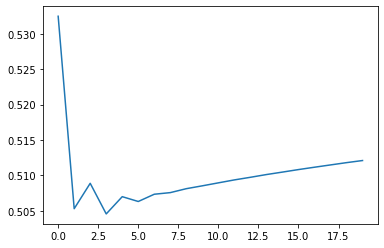

In [13]:
z = linspace(0,1,n)
total_dz = z - sim.z_arr 
total_dz = total_dz #- total_dz[0]
plot(total_dz)

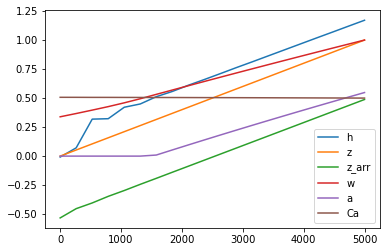

In [14]:
x = linspace(0,5000,n)
z = linspace(0,1,n)

xmid = (x[1:] + x[:-1])/2.
plot(x, sim.h)
plot(x,z)
plot(x,sim.z_arr)

#plot(xmid,sim.fd_mids)
plot(x,sim.CO2_w)
plot(x,sim.CO2_a)
plot(x,sim.Ca)
legend(['h','z','z_arr','w','a','Ca'])


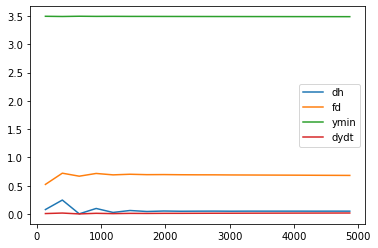

In [15]:
xmid = (x[1:] + x[:-1])/2.
plot(xmid, sim.h[1:]-sim.h[:-1])
plot(xmid,sim.fd_mids)

ymins = []
dydt = []
for i in arange(n-1):
    #print('i=',i, '  ymin=',sim.xcs[i].y.min())
    ymins.append(sim.xcs[i].ymin)
    dydt.append(sim.xcs[i].dr.max())
    
plot(xmid,array(ymins)+4.)
plot(xmid,array(dydt)*100)
legend(['dh','fd','ymin','dydt'])

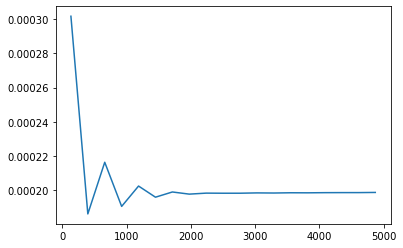

In [16]:
plot(xmid,sim.slopes)

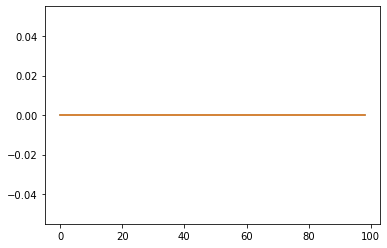

In [17]:
plot(sim.down_offsets)
plot(sim.up_offsets)

In [7]:
sim.flow_type

array(['norm', 'norm', 'pbflood', 'norm', 'norm', 'norm', 'pbflood',
       'norm', 'pbflood', 'pbflood', 'pbflood', 'norm', 'pbflood',
       'pbflood', 'pbflood', 'pbflood', 'pbflood', 'pbflood', 'norm'],
      dtype=object)

In [ ]:
from scipy.interpolate import splprep,splev,interp1d

In [ ]:
splprep()
splev()
interp1d()

In [ ]:
print(sim.flow_type)
print(sim.A_a)
print(sim.A_w)
print(sim.fd_mids)
for i in arange(n-1):
    print('i=',i, '  ymin=',sim.xcs[i].y.min())

about to minimize
found min
Q residual for 0.3488747046211414  = 4.6127693345554555e-08
norm_fd= -0.188753426807091
crit fd, y= -0.5196762198627365


0.1

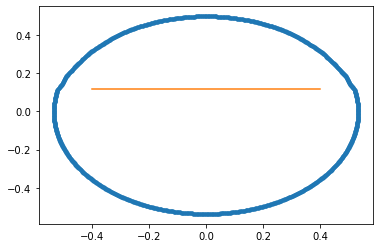

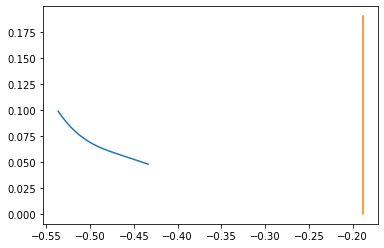

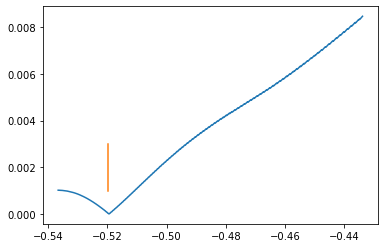

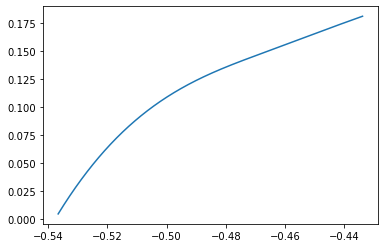

In [43]:
from scipy.signal import savgol_filter

i=42

g=9.8
f=0.1
x=sim.xcs[i].x
y=sim.xcs[i].y
xp=sim.xcs[i].xp
yp=sim.xcs[i].yp
xm=sim.xcs[i].xm
ym=sim.xcs[i].ym
plot(x,y,'.')
wl = sim.fd_mids[i] + y.min()
#wl_old = fd_old + y.min()
plot([-.4,.4],[wl,wl])
#plot([-.4,.4],[wl_old,wl_old],'--')
#xlim([-2.8,2.8])
#ylim([-3.9,-3.75])
maxdepth = y.max() - y.min()
fds=maxdepth*linspace(0.001,0.1,1000)
res=[]
res_alt=[]
res2 = []
As = []
Pws = []
for fd in fds:
    A = sim.xcs[i].A_interp(fd)
    P = sim.xcs[i].P_interp(fd)
    D_H = 4.*A/P
    Q = sign(sim.slopes[i])*A*sqrt(2.*g*abs(sim.slopes[i])*D_H/f)
    res_alt.append(A*sqrt(D_H)-sim.Q_w/(sign(sim.slopes[i])*sqrt(2.*g*abs(sim.slopes[i])/f)))#(abs(sim.Q_w - Q)))
    
    res.append(sim.xcs[i].abs_normal_discharge_residual(fd,sim.slopes[i],0.1,sim.Q_w))
    As.append(sim.xcs[i].calcA(wantidx=y-y.min()<fd))
    Pws.append(sim.xcs[i].calcP(wantidx=y-y.min()<fd))
    res2.append(sim.xcs[i].abs_crit_flow_depth_residual(fd,sim.Q_w))

As = array(As)
fil_As = savgol_filter(As,35,1)


figure()
plot(fds+y.min(),res)
norm_fd_y = sim.xcs[i].calcNormalFlowDepth(sim.Q_w,sim.slopes[i],f=f,old_fd=sim.fd_mids[i]) + y.min()
plot([norm_fd_y,norm_fd_y], [0.0,0.19])
print('norm_fd=',norm_fd_y)
#plot(fds*maxdepth+y.min(),res2)

#plot(fds*maxdepth+y.min(),res_alt)
#plot(fil_As,res_alt)
#xlim([-4,-3])

#ylim([-.05,.2])
#ylim([-0.05,0.05])
figure()
plot(fds+y.min(),res2)
crit_fd_y = sim.xcs[i].calcCritFlowDepth(sim.Q_w)+y.min()
print('crit fd, y=',crit_fd_y)
plot([crit_fd_y,crit_fd_y],[0.001,0.003])
#xlim([-4,-3])
#print(res[0]-res[1])


figure()
#sim.xcs[i].create_A_interp()
#A_spline=sim.xcs[i].AfromSpline(fds*maxdepth)
#sim.xcs[i].create_P_interp()


#plot(fds*maxdepth+y.min(),As)
#plot(fds*maxdepth+y.min(),fil_As)
plot(fds+y.min(),sim.xcs[i].A_interp(fds))

#figure()
#plot(fds*maxdepth+y.min(),Pws)
#plot(fds*maxdepth+y.min(),sim.xcs[i].P_interp(fds))

#figure()

#Pws = array(Pws)
#Qs = fil_As*sqrt(4*fil_As/Pws)
#plot(fds*maxdepth+y.min(),Qs)

#print(Pws[0])
#sim.fd_mids[i]+y.min()
sim.xcs[i].abs_normal_discharge_residual(-3.4-y.min(), sim.slopes[i], 0.1, sim.Q_w)
#-3.67486-y.min()

In [ ]:
fds

In [ ]:
Tb=sim.xcs[-1].T_b
ywet = y[sim.xcs[-1].wetidx]
xwet = x[sim.xcs[-1].wetidx]
#plot(xwet[1:],Tb[1:]-Tb[:-1])
#plot(xwet,Tb)
dr=sim.xcs[-1].dr
#plot(xwet[1:],dr[1:]-dr[:-1])
plot(xwet,dr)

In [ ]:
from scipy.signal import savgol_filter

fil_dr = savgol_filter(dr,15,3,mode='wrap')
plot(xwet,dr,xwet,fil_dr)
figure()
plot(fil_dr[1:]-fil_dr[:-1])

In [ ]:
diff_bnd=0
diff_bnd2=1

V_w = sim.V_w
V_w_mean = sim.V_w_mean
dx = sim.dx_ad
dt = sim.dt_ad
CO2_w = sim.CO2_w
CO2_a = sim.CO2_a
print((1./dt -(np.sign(V_w[0])*V_w[diff_bnd]/V_w_mean)/(2.*dx))*CO2_w[diff_bnd])

print(((np.sign(V_w[0])*V_w[diff_bnd]/V_w_mean)/(2*dx))*CO2_w[diff_bnd2])

In [ ]:
sim.

In [ ]:
np.sign(V_w[0])*(V_w[diff_bnd]/V_w_mean)

In [ ]:
V_w_mean

In [ ]:
from olm.calcite import concCaEqFromPCO2,solutionFromCaPCO2,palmerFromSolution,pwpFromSolution,pwp_to_mm_yr

In [ ]:
concCaEqFromPCO2()

In [ ]:
from olm.calcite import concCaEqFromPCO2,solutionFromCaPCO2,palmerFromSolution,calc_K_H
g=9.8#m/s^2
rho_limestone = 2.6#g/cm^3
rho_w = 998.2#kg/m^3
D_Ca = 10**-9#m^2/s
nu = 1.3e-6#m^2/s at 10 C
Sc = nu/D_Ca
g_mol_CaCO3 = 100.09
L_per_m3 = 1000.
secs_per_year =  3.154e7
secs_per_hour = 60.*60.


#print(Sc)

In [ ]:
sim.update_dimnless_params()
sim.initialize_conc_arrays()

K_w = sim.gas_transf_vel*sim.W/sim.A_w
K_a = sim.gas_transf_vel*sim.W/sim.A_a
        

F = np.zeros(sim.n_nodes - 1)
F_palmer = np.zeros(sim.n_nodes - 1)

mm_yr_to_mols_sec = 100.*rho_limestone/g_mol_CaCO3/secs_per_year/100./(sim.D_H_w/2.)

i=sim.n_nodes-1
this_CO2_w = sim.CO2_w[i]*sim.pCO2_high
this_CO2_a = sim.CO2_a[i]*sim.pCO2_high
this_Ca = sim.Ca[i]*sim.Ca_eq_0
#if palmer:
sol = solutionFromCaPCO2(this_Ca, this_CO2_w, T_C=sim.T_cave)
F_pwp = pwp_to_mm_yr(pwpFromSolution(sol,PCO2=this_CO2_w))
F_palmer[i-1] = palmerFromSolution(sol, PCO2=this_CO2_w)
R_palmer = F_palmer[i-1]*mm_yr_to_mols_sec[i-1]
this_xc = sim.xcs[i-1]
eSlope = (sim.h[i] - sim.h[i-1])/sim.L_arr[i-1]
this_xc.setEnergySlope(eSlope)
this_xc.setMaxVelPoint(sim.fd_mids[i-1])
this_xc.calcUmax(sim.Q_w)
T_b = this_xc.calcT_b()
eps = 5*nu*Sc**(-1./3.)/np.sqrt(T_b/rho_w)
#print(eps)
Ca_Eq = concCaEqFromPCO2(this_CO2_w, T_C=sim.T_cave)
#print(this_Ca,Ca_Eq)
F_xc = (D_Ca/eps)*(Ca_Eq - this_Ca)*L_per_m3
P_w = this_xc.wet_ls.sum()
A_w = this_xc.calcA(this_xc.wetidx)
F[i-1] = np.sum(F_xc*this_xc.wet_ls)/P_w #Units of F are mols/m^2/sec
R = F[i-1]*P_w*sim.L_arr[i-1]#4.*F[i-1]/sim.D_H_w[i-1]
sim.F = F
R_CO2 = R/sim.K_H
#dx is negative, so signs on dC terms flip
dCO2_a = -sim.L_arr[i-1]*K_a[i-1]/sim.V_a[i-1]*(this_CO2_w - this_CO2_a)
dCO2_w = sim.L_arr[i-1]*K_w[i-1]/sim.V_w[i-1]*(this_CO2_w - this_CO2_a) - R_CO2/sim.Q_w/L_per_m3#sim.L_arr[i-1]*R_CO2/sim.V_w[i-1]
dCa = R/sim.Q_w/L_per_m3#-sim.L_arr[i-1]*R/sim.V_w[i-1]/(sim.L_arr[i-1]*A_w)/L_per_m3
print(dCO2_a,dCO2_w,dCa)
sim.CO2_a[i-1] = (this_CO2_a + dCO2_a)/sim.pCO2_high
sim.CO2_w[i-1] = (this_CO2_w + dCO2_w)/sim.pCO2_high
sim.Ca[i-1] = (this_Ca + dCa)/sim.Ca_eq_0


In [ ]:
print(sim.Q_w)
print(A_w*sim.V_w[i-1])
sim.L_arr[i-1]*R_CO2/sim.V_w[i-1]
R_CO2/sim.Q_w/L_per_m3

In [ ]:
this_xc.x[this_xc.wetidx].shape
F_xc.

In [ ]:
Re = abs(sim.V_w[i-1])*sim.D_H_w[i-1]/nu
print(Re)
f = 0.1
Sh = (f/8)*(Re-1000)*Sc/(1+12.7*sqrt(f/8)*(Sc**(2./3.) - 1))
print(Sh)
eps_test = sim.D_H_w[i-1]/Sh
print(eps_test)

In [ ]:
D_Ca/eps_test

In [ ]:
sim.D_H_w[i-1]

In [ ]:
eSlope

In [ ]:
cm_m=100.
F_to_m_yr = g_mol_CaCO3*secs_per_year/rho_limestone/cm_m**3
print(F_to_m_yr*sim.xcs[0].F_xc)